# 회귀분석 과제
2022-01-20
- 출처 18기 DS 신혜연님

---

제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 20기_학과명_이름.ipynb  
- graduate_submission.csv

# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"## TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [1]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
graduate_train.csv 파일과 graduate_test.csv 파일을 My Drive에 넣어주세요.  
(Jupyter Notebook을 사용하시는 경우에는 graduate_train.csv 파일과 graduate_test.csv 파일 경로를 각각의 로컬 디렉토리 위치로 변경해주세요.)

In [3]:
# train 데이터 불러오기
df = pd.read_csv("graduate_train.csv")

# train 데이터 크기 확인
print("data size:", df.shape)

# train 데이터 훑어보기
df.head(10)

data size: (400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,No,0.71
1,307,105,2,2.5,4.5,8.12,Yes,0.67
2,329,111,4,4.5,4.0,9.01,Yes,0.81
3,300,105,1,1.0,2.0,7.80,No,0.58
4,329,114,5,4.0,5.0,9.30,Yes,0.86
5,300,104,3,3.5,3.0,8.16,No,0.71
6,318,103,3,4.0,4.5,8.49,Yes,0.71
7,322,110,4,4.0,5.0,9.13,Yes,0.86
8,315,105,2,2.0,2.5,7.65,No,0.39
9,332,119,4,5.0,4.5,9.24,Yes,0.90


In [4]:
# test 데이터 불러오기
test = pd.read_csv("graduate_test.csv")

# test 데이터 크기 확인
print("data size:", test.shape)

# test 데이터 훑어보기
test.head(10)

# test 데이터에는 'Chance of Admit'이 없습니다. 이 확률을 예측해보는 것이 과제입니다.

data size: (100, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No
5,330,116,4,5.0,4.5,9.45,Yes
6,315,110,2,3.5,3.0,8.46,Yes
7,317,107,3,4.0,3.0,8.70,No
8,330,114,3,4.5,4.5,9.24,Yes
9,323,111,5,4.0,5.0,9.86,Yes


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [5]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Chance of Admit      0.0
Research             0.0
CGPA                 0.0
LOR                  0.0
SOP                  0.0
University Rating    0.0
TOEFL Score          0.0
GRE Score            0.0
dtype: float64

In [6]:
(test.isnull().sum()/len(df)*100).sort_values(ascending=False)

Research             0.0
CGPA                 0.0
LOR                  0.0
SOP                  0.0
University Rating    0.0
TOEFL Score          0.0
GRE Score            0.0
dtype: float64

Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. train 데이터와 test 데이터 모두 결측치가 존재하지 않습니다.

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [7]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit      float64
dtype: object

In [8]:
df_origin = df.copy()

In [10]:
df = pd.get_dummies(df)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_No,Research_Yes
0,310,105,2,3.0,3.5,8.01,0.71,1,0
1,307,105,2,2.5,4.5,8.12,0.67,0,1
2,329,111,4,4.5,4.0,9.01,0.81,0,1
3,300,105,1,1.0,2.0,7.80,0.58,1,0
4,329,114,5,4.0,5.0,9.30,0.86,0,1


In [11]:
test.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
dtype: object

In [12]:
test_origin = test.copy()

In [13]:
test = pd.get_dummies(test)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_No,Research_Yes
0,304,103,5,5.0,4.0,8.64,1,0
1,297,96,2,2.5,1.5,7.89,1,0
2,302,101,2,2.5,3.5,7.96,1,0
3,318,112,3,4.0,3.5,8.67,1,0
4,304,100,4,1.5,2.5,7.84,1,0


Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요?  
A. 'Research'가 범주형 자료였습니다. 이에 'Research'를 더미변수로 만들어 분석을 진행하였습니다.

# 3. 선형(Linear) 회귀

In [14]:
# 먼저 데이터를 설명변수와 종속변수로 분리합니다.
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [15]:
# 데이터를 train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [16]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 8)
training response size: (320,)
test predictors size: (80, 8)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# 1. 먼저 모델을 만들어 줍니다.
linear = LinearRegression()

# 2. 모델을 적합시킵니다.
linear.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
print("Training R^2: %.2f" % linear.score(X_train, y_train))

Training R^2: 0.83


#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# 4. X_test로 y_pred를 만들어줍니다.
y_pred = linear.predict(X_test)

print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))

MSE: 0.0040
Variance score: 0.7729


#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [21]:
print("intercept:", linear.intercept_)

intercept: -1.2419421437018667


Q. 절편 계수의 의미는 무엇인가요?  
A. 독립변수가 모두 0일 때 종속변수의 값이 됩니다. 회귀 식의 상수항이기도 합니다.

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [22]:
beta = pd.DataFrame(linear.coef_, index=X.columns, columns=['slope'])
beta.sort_values('slope')

,slope
Research_No,-0.013241
GRE Score,0.001640
University Rating,0.002748
TOEFL Score,0.003606
SOP,0.007253
Research_Yes,0.013241
LOR,0.017343
CGPA,0.112079


Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?  
A. 기울기 계수는 회귀 계수라고도 하며, 이는 독립변수의 변화가 종속변수의 변화에 미치는 영향에 대한 지표이기도 합니다. 예측 변인들 중에서 'CGPA'가 가장 높은 회귀 계수를 가지고 있으므로, 대학원 합격 확률과 유의미한 관계에 있음을 알 수 있습니다. 따라서 독립 변수들 중에서는 누적 학점 평균(CGPA)이 대학원 합격에 가장 큰 영향을 미친다고 해석할 수 있습니다.

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

[]

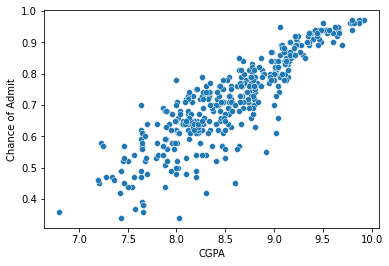

In [25]:
sns.scatterplot(x="CGPA", y="Chance of Admit", data=df_origin)
plt.plot()

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

[]

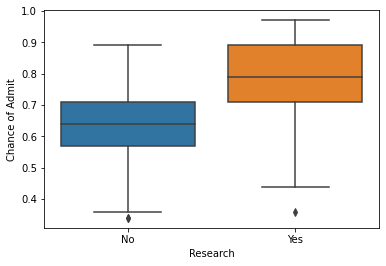

In [26]:
sns.boxplot(x="Research", y="Chance of Admit", data=df_origin)
plt.plot()

### 3.2. StatsModels로 선형 회귀 시행하기

In [27]:
import statsmodels.api as sm

In [28]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     211.6
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          1.99e-114
Time:                        16:20:40   Log-Likelihood:                 449.18
No. Observations:                 320   AIC:                            -882.4
Df Residuals:                     312   BIC:                            -852.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.0016      0.001      2.571      0.011       0.000       0.003
TOEFL Score           0.0036      0.001      3.161      0.002       0.001       0.006
University Rating     0.0027      0.005      0.582      0.561      -0.007       0.012
SOP                   0.0073      0.006      1.273      0.204      -0.004       0.018
LOR                   0.0173      0.005      3.391      0.001       0.007       0.027
CGPA                  0.1121      0.012      9.237      0.000       0.088       0.136
Research_No          -1.2552      0.132     -9.498      0.000      -1.515      -0.995
Research_Yes         -1.2287      0.136     -9.065      0.000      -1.495      -0.962
==============================================================================
Omnibus:                       72.061   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.598
Skew:                          -1.110   Prob(JB):                     2.99e-36
Kurtosis:                       5.710   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?  
A. R-squared는 모형이 잘 적합되었는지를, F-statistic은 모형이 통계적으로 적절한지를 판단할 때 이용합니다. R^2 값이 0.826으로 높은 편이기에 모형의 설명력이 높음을 알 수 있습니다. 또한, F-statistic의 값이 211.6으로 높고 이는 p-value를 작게 만들어주므로 추정된 모형이 통계적으로 유의함을 의미합니다. 따라서 이 모델은 좋은 모델이라고 할 수 있습니다.

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?  
A. Universal Rating의 t 검정의 p-value는 0.561으로, 유의수준인 0.05보다 큰 값이다. 따라서 Universal Rating이 대학원 합격률에 유의미한 영향을 미치지 못한다고 해석할 수 있다.

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [34]:
from sklearn.linear_model import RidgeCV

# 1. 먼저 모델을 만들어 줍니다.
alphas = np.arange(1, 50, 1)
ridge = RidgeCV(alphas = alphas, cv = 2)

# 2. 모델을 적합시킵니다.
ridge.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
print("Training R^2: %.2f" % ridge.score(X_train, y_train))

Training R^2: 0.83


In [40]:
from sklearn.linear_model import LassoCV

# 1. 먼저 모델을 만들어 줍니다.
alphas = np.arange(1, 50, 1)
lasso = LassoCV(alphas = alphas, cv =2)

# 2. 모델을 적합시킵니다.
lasso.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
print("Training R^2: %.2f" % lasso.score(X_train, y_train))

Training R^2: 0.28


In [41]:
alpha = ridge.alpha_
print("Best alpha:", alpha)

Best alpha: 1


In [56]:
pred = ridge.predict(test)
pd_test_pred = pd.DataFrame({'Chance of Admit': np.round(pred, 2)})

In [57]:
pd_test_pred

,Chance of Admit
0,0.70
1,0.51
2,0.58
3,0.74
4,0.55
...,...
95,0.62
96,0.56
97,0.76
98,0.65


In [60]:
graduate_submission = pd.concat([test_origin, pd_test_pred], axis=1)
graduate_submission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,304,103,5,5.0,4.0,8.64,No,0.70
1,297,96,2,2.5,1.5,7.89,No,0.51
2,302,101,2,2.5,3.5,7.96,No,0.58
3,318,112,3,4.0,3.5,8.67,No,0.74
4,304,100,4,1.5,2.5,7.84,No,0.55


In [61]:
graduate_submission.shape

(100, 8)

In [63]:
graduate_submission.to_csv('graduate_submission.csv', index=False)